# Przetwarzanie Grafiki i Muzyki - laboratorium nr 11

## Zadanie 1 (2 punkty)

  * Proszę wygenerować dane w kształcie sinusa.
  * Proszę dodać szum typu pieprz i sól
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.

Proszę narysować wykres sinusa, zaszumionego sinusa i odszumionego sinusa.

In [ ]:
# Było

## Zadanie 2 (1 punkt)

 Proszę wygenerować dane w kształcie sinusa.
  * Proszę dodać szum Gaussowski
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.
  
Proszę narysować wykres sinusa, zaszumionego sinusa i odszumionego sinusa.

In [ ]:
# Było

## Zadanie 3 (1 punkt)

Proszę wygenerować dane w kształcie sinusa i zapisać jako plik z rozszerzeniem .wav.

In [1]:
# scipy.io.wavefile.write
import numpy as np
from scipy.io.wavfile import write
samplerate = 44100
duration = 5
frequency = 440

t = np.linspace(0, duration, int(samplerate * duration), endpoint=False)

amplitude = np.iinfo(np.int16).max  
signal = amplitude * np.sin(2 * np.pi * frequency * t)
signal = signal.astype(np.int16)
write('sinus_wave.wav', samplerate, signal)

## Zadanie 4 (1 punkt)

Proszę narysować głos: https://raw.githubusercontent.com/przem85/PGiM/master/img/ja1.wav

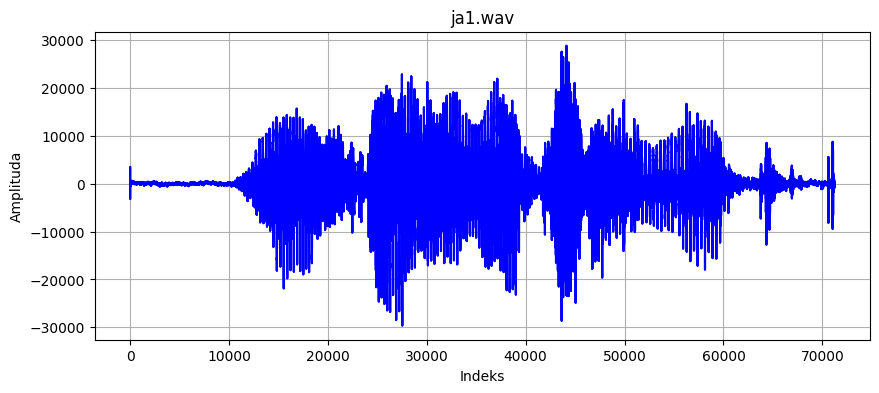

In [83]:
import matplotlib.pyplot as plt
from scipy.io import wavfile

wav_file_path = './img/ja1.wav'
sample_rate, data = wavfile.read(wav_file_path)

plt.figure(figsize=(10, 4))
plt.plot(data, color='blue')
plt.title('ja1.wav')
plt.xlabel('Indeks')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

## Zadanie 5 (2 punkty)

  * Proszę wykonać progowanie głosu.
  * Jeżeli wartość mniejsza niż 0 to -400, w odwrotnym przypadku 400.
  * Proszę narysować głos przed progowaniem i po progowaniu.

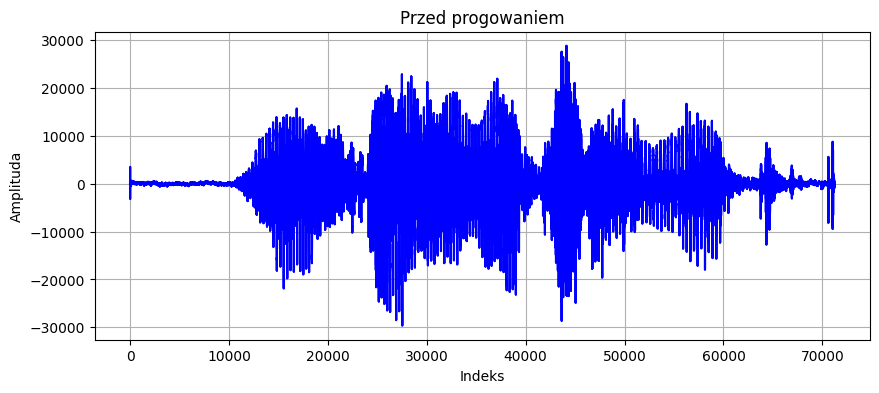

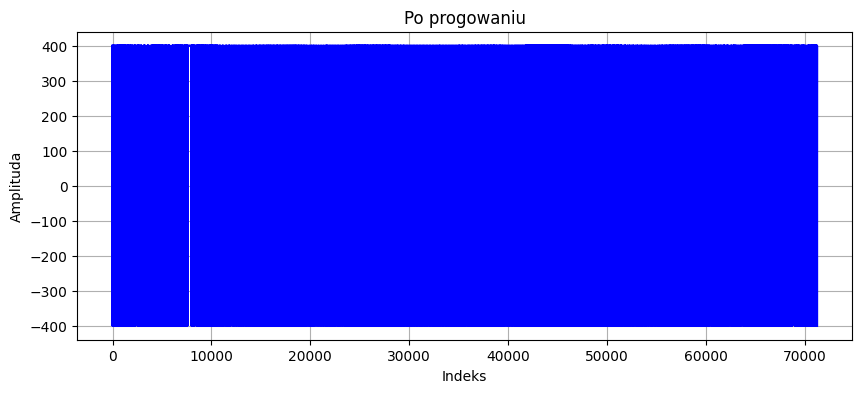

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

wav_file_path = './img/ja1.wav'
sample_rate, data = wavfile.read(wav_file_path)
new_data = np.where(data < 0, -400, 400)

plt.figure(figsize=(10, 4))
plt.plot(data, color='blue')
plt.title('Przed progowaniem')
plt.xlabel('Indeks')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(new_data, color='blue')
plt.title('Po progowaniu')
plt.xlabel('Indeks')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Zadanie 6 (3 punkty) 

  * Proszę dodać szum typu pieprz i sól −200,200, Gaussowski N(0,200), jednostajny na odcinku [−200,200]
  * Proszę usunąć szum filtrem medianowym i średniej ruchomej.
  * Odpalić dźwięk przed i po filtrowaniu i porównać.

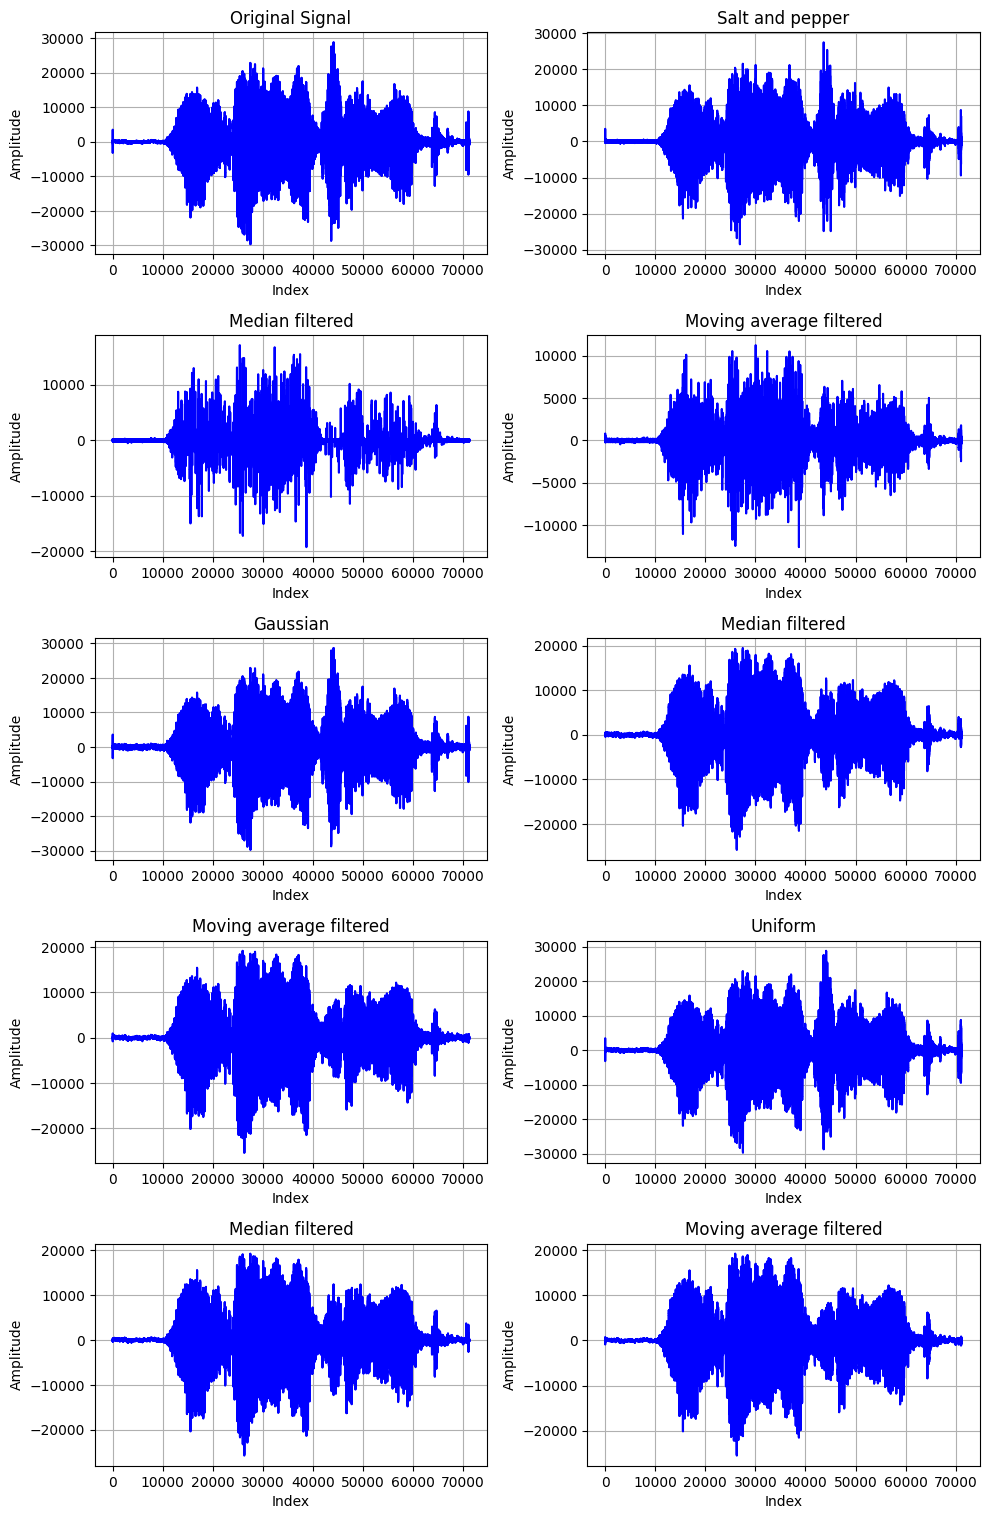

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.signal
from IPython.display import Audio

wav_file_path = './img/ja1.wav'
sample_rate, data = wavfile.read(wav_file_path)

def add_salt_and_pepper_noise(data, prob=0.9):
    noisy = np.copy(data)
    num_salt = int(np.ceil(prob * len(data)))
    num_pepper = int(np.ceil(prob * len(data)))
    
    for channel in range(data.shape[1]):
        salt_coords = np.random.randint(0, data.shape[0] - 1, num_salt)
        pepper_coords = np.random.randint(0, data.shape[0] - 1, num_pepper)
        
        noisy[salt_coords, channel] = 200
        noisy[pepper_coords, channel] = -200
    return noisy


def add_gaussian_noise(data, mean=0, std=200):
    noise = np.random.normal(mean, std, data.shape)
    return np.int16(data + noise)


def add_uniform_noise(data, low=-200, high=200):
    noise = np.random.uniform(low, high, data.shape)
    return np.int16(data + noise)

sp_data = add_salt_and_pepper_noise(data)
gauss_data = add_gaussian_noise(data)
uni_data = add_uniform_noise(data)

def median_filter(data):
    median_filtered = np.copy(data)
    for channel in range(data.shape[1]):
        median_filtered[:, channel] = scipy.signal.medfilt(data[:, channel], kernel_size=5)
    return median_filtered

def moving_average_filter(data, window_size=5):
    filtered_data = np.copy(data)
    for channel in range(data.shape[1]):
        filtered_data[:, channel] = np.convolve(data[:, channel], np.ones(window_size) / window_size, mode='same')
    return filtered_data

plt.figure(figsize=(10, 30))

plt.subplot(10, 2, 1)
plt.plot(data, color='blue')
plt.title('Original Signal')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)


plt.subplot(10, 2, 2)
plt.plot(sp_data, color='blue')
plt.title('Salt and pepper')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

sp_median = median_filter(sp_data)
plt.subplot(10, 2, 3)
plt.plot(sp_median, color='blue')
plt.title('Median filtered')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

sp_avg = moving_average_filter(sp_data)
plt.subplot(10, 2, 4)
plt.plot(sp_avg, color='blue')
plt.title('Moving average filtered')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(10, 2, 5)
plt.plot(gauss_data, color='blue')
plt.title('Gaussian')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

gauss_median = median_filter(gauss_data)
plt.subplot(10, 2, 6)
plt.plot(gauss_median, color='blue')
plt.title('Median filtered')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

gauss_average = moving_average_filter(gauss_data)
plt.subplot(10, 2, 7)
plt.plot(gauss_average, color='blue')
plt.title('Moving average filtered')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(10, 2, 8)
plt.plot(uni_data, color='blue')
plt.title('Uniform')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

uni_median = median_filter(uni_data)
plt.subplot(10, 2, 9)
plt.plot(uni_median, color='blue')
plt.title('Median filtered')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

uni_average = moving_average_filter(uni_data)
plt.subplot(10, 2, 10)
plt.plot(uni_average, color='blue')
plt.title('Moving average filtered')
plt.xlabel('Index')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()

write('salt_pepper.wav', samplerate, sp_data)
write('salt_pepper_median.wav', samplerate, sp_median)
write('salt_pepper_avg.wav', samplerate, sp_avg)

write('gauss.wav', samplerate, gauss_data)
write('gauss_median.wav', samplerate, gauss_median)
write('gauss_avg.wav', samplerate, gauss_average)

write('uniform.wav', samplerate, uni_data)
write('uniform_median.wav', samplerate, uni_median)
write('uniform_avg.wav', samplerate, uni_average)

- Z szumem salt and pepper najlepiej radzi sobie filtr średniej ruchomej, dzięki któremu lepiej słyszymy głos w nagraniu. Po użyciu filtru medianowego, jakość jest zdecydowanie gorsza.
- W przypadku szumu gaussowskiego, filtr średniej ruchomej lepiej pozbywa się szumu z tła, ale jest gorsza jakość głosu, w przeciwieństwie do filtru medianowego.
- Podobnie w przypadku szumu jednostajnego.